# A DIVERSE CANADA

Canada has built a reputation over the last half century for welcoming immigrants and valuing multiculturalism. Foreign-born people make up about one-quarter of Canada’s population—the largest share in over 150 years and one of the highest ratios for industrialized Western nations. Immigrants have helped the country counter aging demographics and fuel economic growth, though some Canadians have expressed concern about the increasing strain on housing and social services. 

In recent years, Canada has become an even more attractive destination for immigrants after policies enacted under U.S. President Donald Trump severely restricted access to the United States. Yet, Canada is also experiencing a labor shortage exacerbated by a dearth of skilled workers. Its immigration system faces an array of other challenges as well, including a surge in asylum claims, rising deportations, and labor abuses against temporary-visa holders.

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [4]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's observe our dataframes.

In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Let's clean our data by dropping unecessary columns and rename our column in the more observable format.

In [7]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


C:\Users\Dell\AppData\Local\Temp\ipykernel_10312\3015018611.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# IMMIGRATION BY CONTINENT<a id="4"></a>

In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

Matplotlib version:  3.5.2


In [9]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


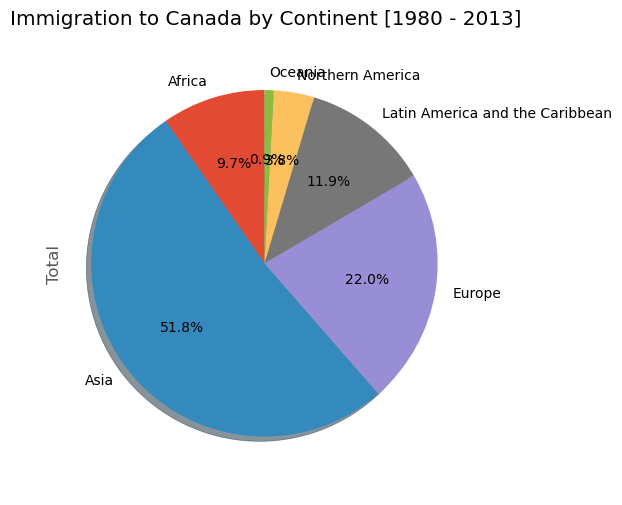

In [10]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

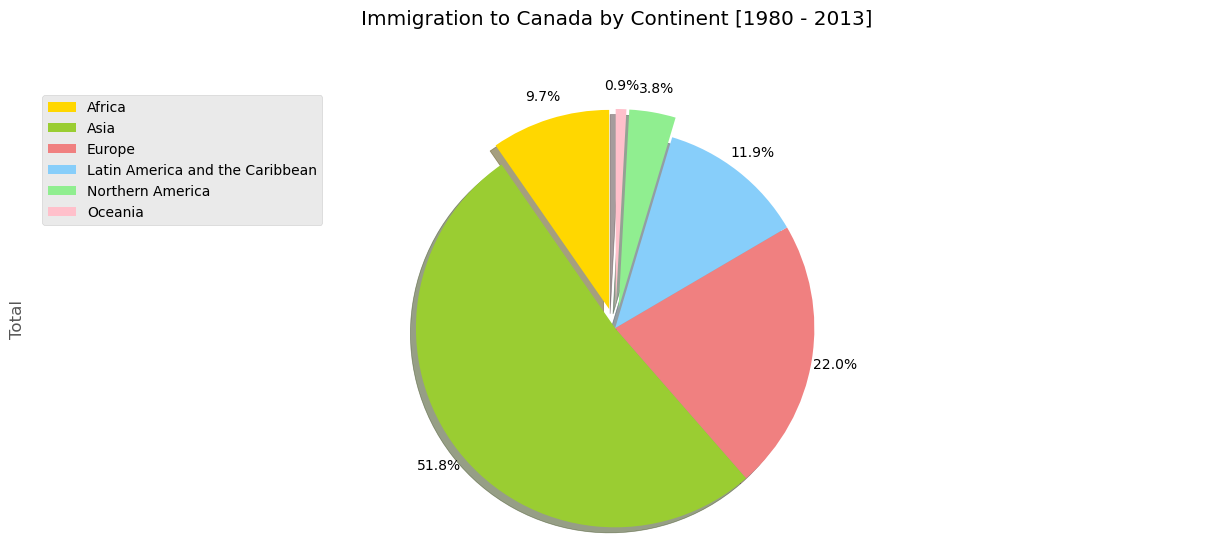

In [11]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

Japanese are one of the biggest foreign communities in Canada and the Canadan administration has long encouraged Japanese immigrants in Canada. The first generation of immigrants, called Issei, arrived between 1877 and 1928, and the second after 1967. How about the 21st century?

In [10]:
# df japan and transpose
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


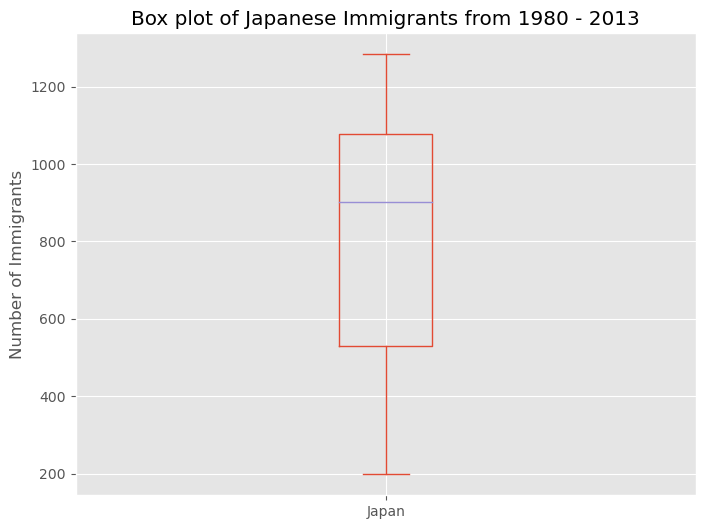

In [27]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can conclude right away from the graph that:
1. Each year, there is a minimum of 200 people came from Japan since the 1980s.
2. During this period, around 800 people came to Canada each year.
2. One third of these periods witness Japanese immigrations flow above 1000 people per year.

In [28]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Chinese and Indians stands as two biggest immigrants flow to Canada. Let's see how the data tell us about these two flows of immigrants.

In [32]:
df_CI = df_can.loc[['China','India'],years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [33]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


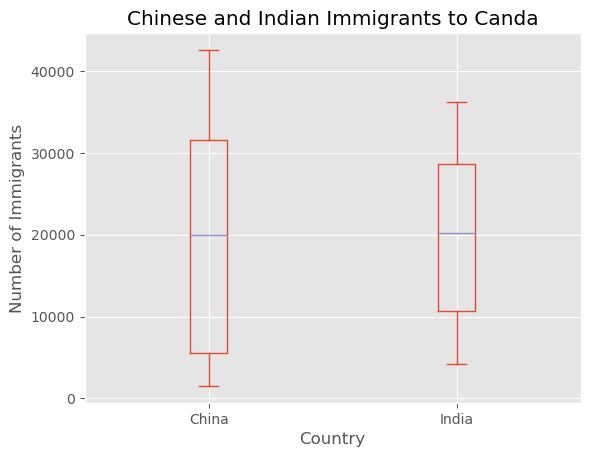

In [38]:
### type your answer here
df_CI.plot(kind='box')

plt.title('Chinese and Indian Immigrants to Canda')
plt.ylabel('Number of Immigrants')
plt.xlabel('Country')

plt.show()

We can see that, although both countries have the same average immigrant population (~20,000), China's immigrant population is more spread out than that of India. India's maximum population in any given year (36,210) is about 15% less than the maximum population from China (42,584).

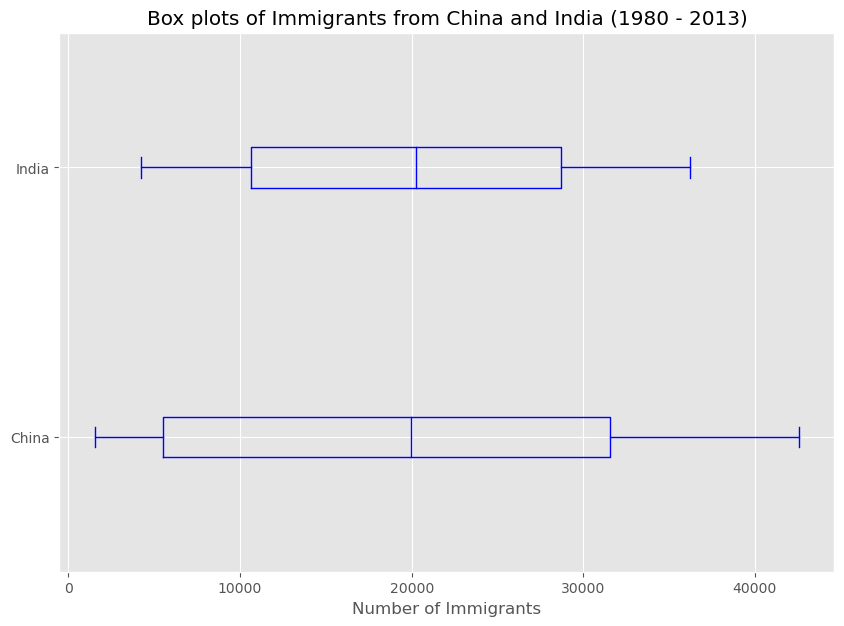

In [39]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

The Indian immigrant flows is more stable than its Chinese counterpart.

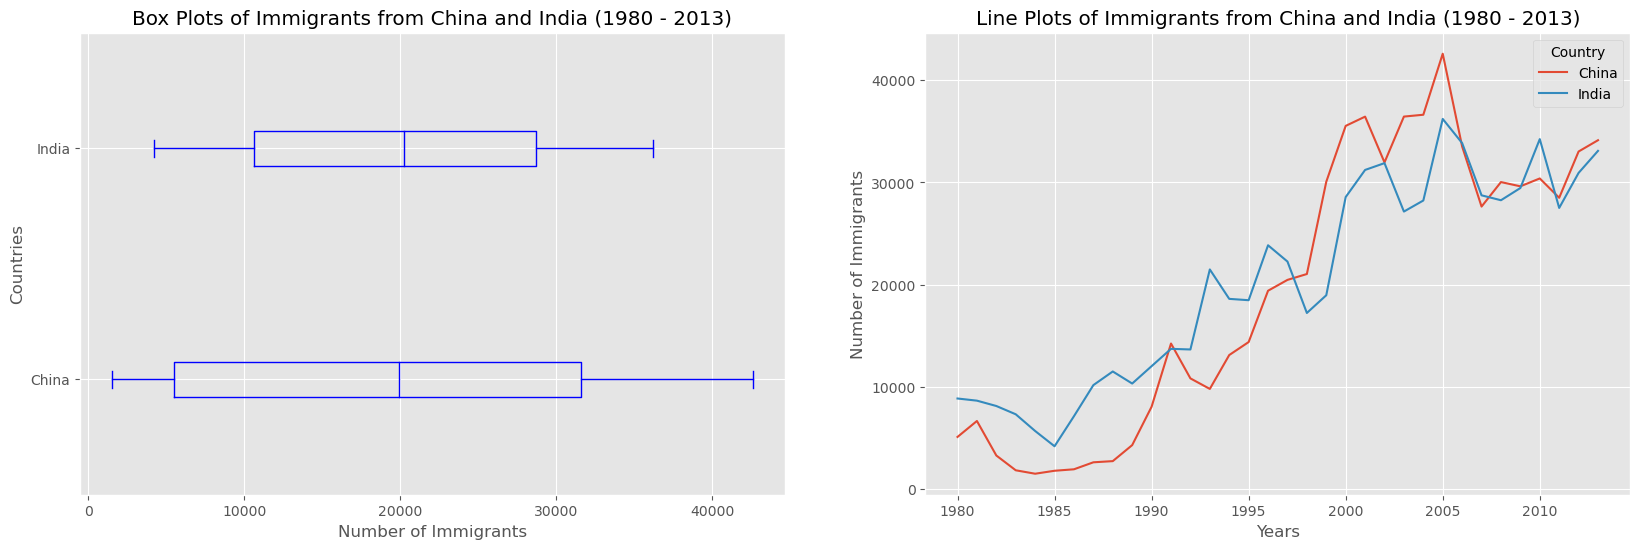

In [40]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Let's obersve the top 15 immigrant flows in Canada.

In [49]:
df_top15 = df_can.sort_values(by='Total', ascending=True).tail(15)
df_top15 = df_top15.drop(['Continent','Region','DevName'], axis=1)
df_top15

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Romania,375,438,583,543,524,604,656,1202,1106,1582,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Jamaica,3198,2634,2661,2455,2508,2938,4649,5415,3924,3946,...,1945,1722,2141,2334,2456,2321,2059,2182,2479,106431
France,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,...,4429,4002,4290,4532,5051,4646,4080,6280,5623,109091
Lebanon,1409,1119,1159,789,1253,1683,2576,3803,3970,7157,...,3709,3802,3467,3566,3077,3432,3072,1614,2172,115359
Poland,863,2930,5881,4546,3588,2819,4808,6931,9211,16025,...,1405,1263,1235,1267,1013,795,720,779,852,139241
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923


We have already observed the immigrant flows by Country. Let's see the data trend in years.

In [53]:
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

#cut df
df_80s = df_top15.loc[:,years_80s].sum(axis=1)
df_90s = df_top15.loc[:,years_90s].sum(axis=1)
df_00s = df_top15.loc[:,years_00s].sum(axis=1)

#merge toghether
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})
new_df

,1980s,1990s,2000s
Country,,,
Romania,7613,33659,45515
Viet Nam,30638,37726,21274
Jamaica,34328,40329,22733
France,17137,30028,41297
Lebanon,24918,49245,30906
Poland,57602,64864,13629
Republic of Korea,16259,38189,68183
Sri Lanka,14796,70421,49678
Iran (Islamic Republic of),21477,54871,65794


In [54]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


<AxesSubplot:>

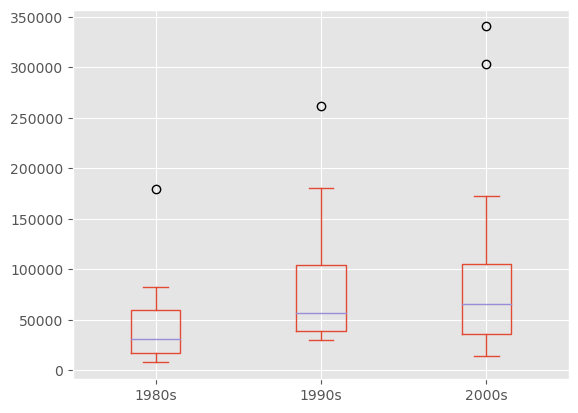

In [58]:
new_df.plot(kind='box')

It looks like the average number of immigrants have gradually increased by decades although the growth in the 1990s are more rapidly but the 2000s observes a more stable flows of immigrant by year.

Let's see the 2 outlier dots in the 2000s belongs to whom

In [59]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
China,32003,161528,340385
India,82154,180395,303591


China and India are both considered as outliers because their populations over the decade exceeded 209,611.5.

Let's obersve these data trends more specifically by year.

In [60]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


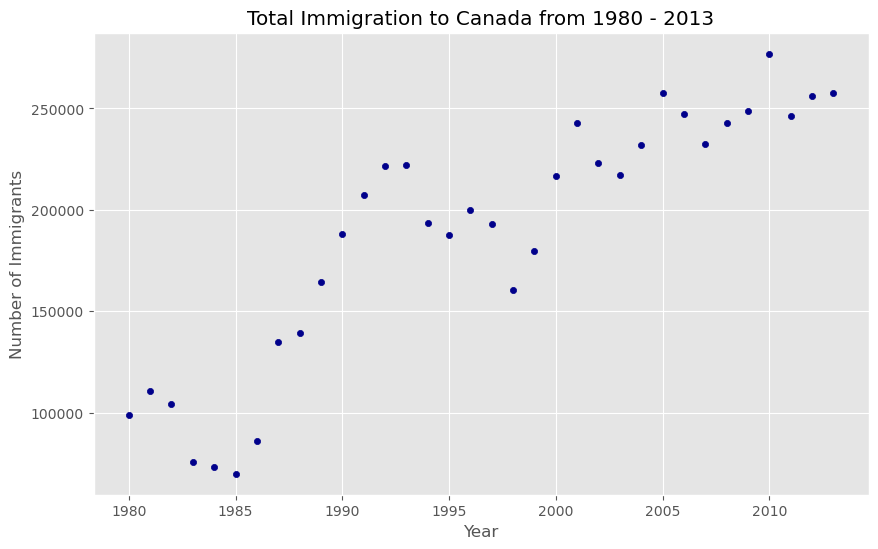

In [64]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Looks like there is a linear trend exists. Let's add one to examine our hypothesis.

In [65]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

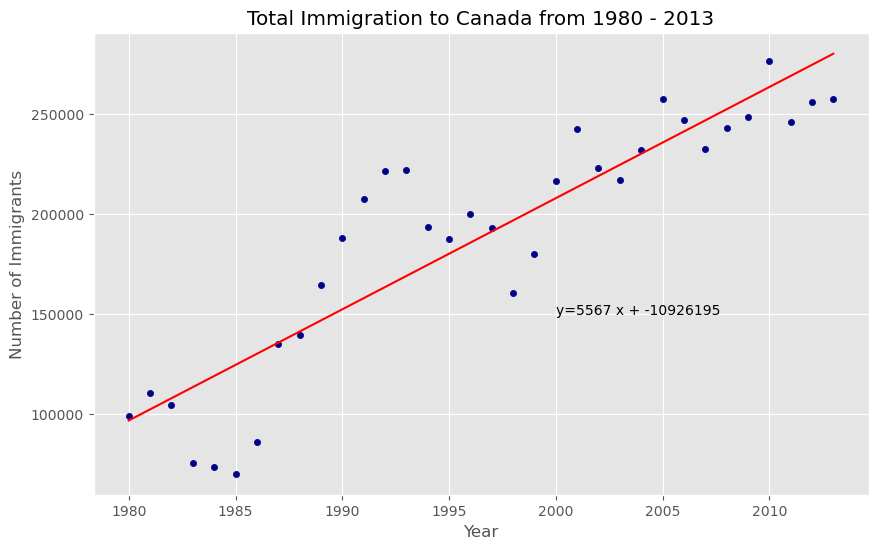

'No. Immigrants = 5567 * Year + -10926195'

In [66]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the best-fit line equation, we can estimate the number of immigrants in 2015:
```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291.310
```
When compared with reality from Citizenship and Immigration Canada (CIC) [Annual Report 2016](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/ index.asp), we see that Canada admitted 271,845 immigrants in 2015. Our estimate of 291,310 is only about 7% of the actual number, which is still pretty good considering the data. our original from the United Nations (and may differ slightly from the CIC data).

As a further note, we can observe that immigration declined between 1993 and 1997. Further analysis on this topic shows that in 1993, Canada put into practice Canada's Bill C-86. successful, introduced modifications to the refugee identification system, most of which were limited. Additional amendments to the Immigration Regulations removed the necessary sponsorship rights for "assisted relatives" and reduced the number of points awarded to them, making it difficult for family members (other than the nuclear family) to more immigration to Canada. These restrictive measures have had a direct impact on immigration numbers over the next few years.

In [89]:
### type your answer here
df_countries = df_can.loc[['Denmark','Norway','Sweden']]

#count total
df_total = pd.DataFrame(df_countries[years].sum(axis=0))

#reset index
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace=True)

#rename column
df_total.columns = ['Year','Total']

#display
df_total.head(5)

,Year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


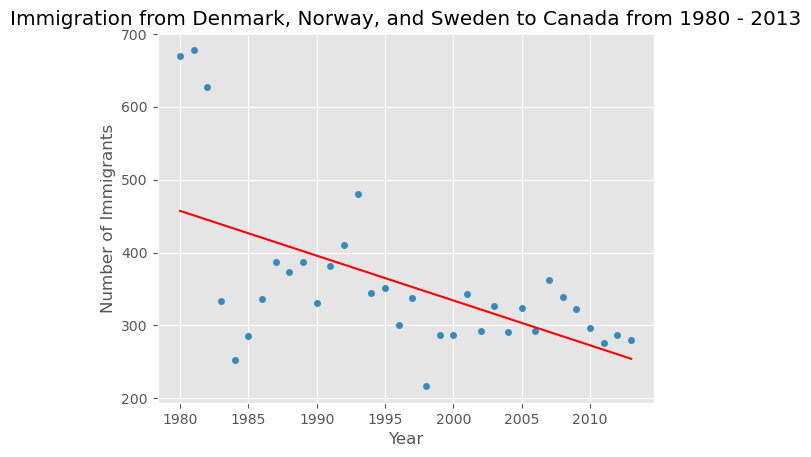

In [96]:
### type your answer here
df_total.plot(kind='scatter', x='Year', y='Total')

#add title and lables
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

#regression with polyfit
x = df_total['Year']
y = df_total['Total']
fit = np.polyfit(x,y,deg=1)

#plot regression plit
plt.plot(x, fit[0]*x + fit[1], color = 'red')

#display
plt.show()

**Let's start by analyzing the impact of the Great Recession in Argentina**.

Argentina experienced a major crisis from 1998 to 2002, causing widespread unemployment, riots, government collapse, and foreign defaults. In terms of income, more than 50% of Argentines are poor, and seven in 10 Argentine children were poor at the height of the crisis in 2002.

Let's analyze the impact of this crisis, and compare immigration in Argentina versus neighboring Brazil. Do that using ` histogram We will weight the bubble as the *normalized* value of the annual population.

# Data Preprocessing

In [98]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [99]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

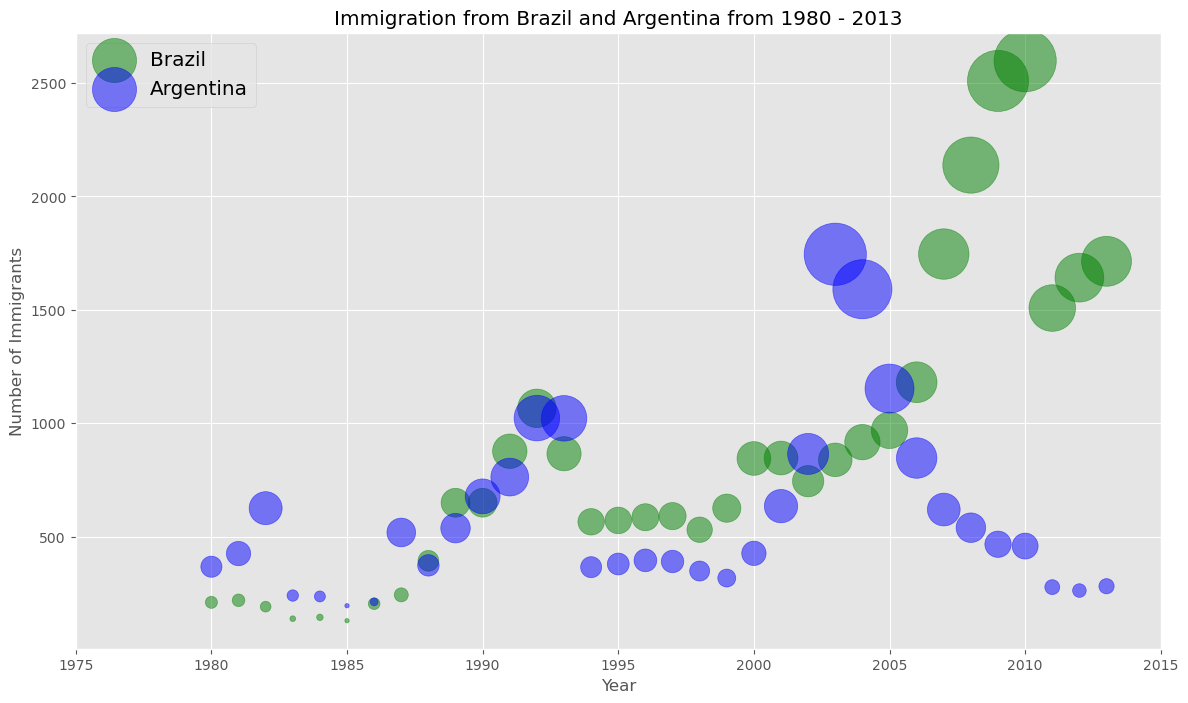

In [100]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the level of the immigrant population that year, compared with the 1980-2013 data. The bigger the bubble, the larger the number of immigrants that year.

From the chart above, we can see a corresponding increase in immigration from Argentina during the Great Recession of 1998-2002. We can also observe a similar spike around 1985 to 1993. In fact, Argentina suffered a great recession from 1974-1990, just before the start of the 1998-2002 great recession.

Similarly, Brazil suffered from the **Samba Effect** when the Brazilian real (currency) fell by nearly 35% in 1999. There was concern of a South American financial crisis as many South American countries depended heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program and the economy gradually recovered over the years, culminating in a spike in 2010. Immigration data reflects these events.

Let's return back to two of the biggest immigrant flows to Canada: China and India

In [101]:
# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

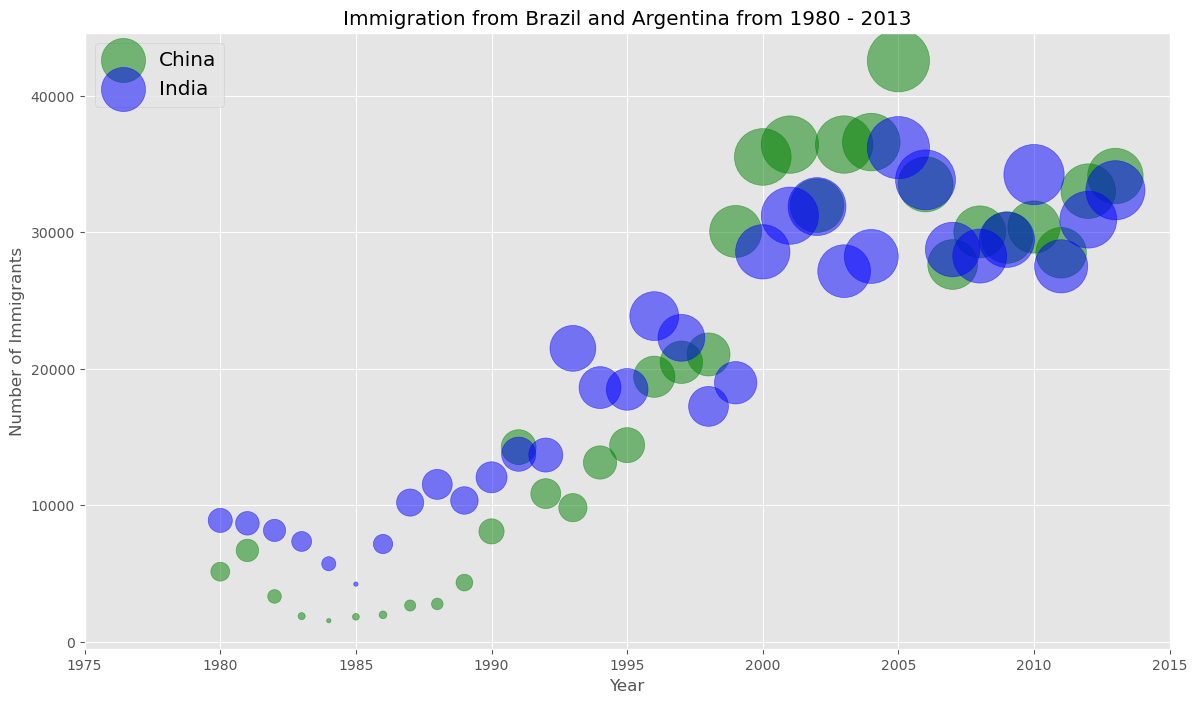

In [103]:
### type your answer here
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

These two flows are not only large comparing to other immgirants flow but demonstrate a stable and "Linearly" increase.